In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'AFSNT_DLY.CSV',
 '1. EDA.ipynb',
 'SFSNT.CSV',
 'AFSNT.CSV']

In [3]:
flight = pd.read_csv('AFSNT.CSV', encoding='utf-8')
print(flight.shape)
flight.head(2)

(987709, 17)


,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP1,ARP3,A,A1901,SEw3Nzc2,D,N,6:10,6:18,N,NaN,N,NaN
1,2017,1,1,일,ARP1,ARP3,A,A1905,SEw4MjM2,D,N,6:15,6:25,N,NaN,N,NaN


In [4]:
print('delay')
print(flight.DLY.value_counts())
print('cancel')
print(flight.CNL.value_counts())

delay
N    868772
Y    118937
Name: DLY, dtype: int64
cancel
N    979450
Y      8259
Name: CNL, dtype: int64


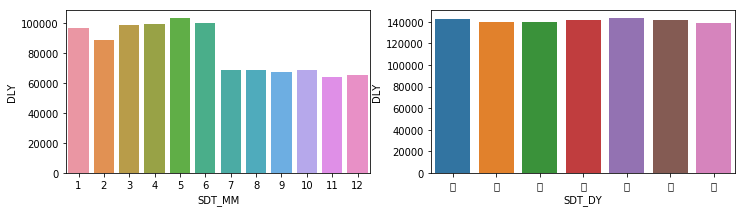

In [9]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
month = flight.groupby(['SDT_MM']).DLY.count()
month = pd.DataFrame(month).reset_index()
sns.barplot(month.SDT_MM,month.DLY)

plt.subplot(1,2,2)
month = flight.groupby(['SDT_DY']).DLY.count()
month = pd.DataFrame(month).reset_index()
sns.barplot(month.SDT_DY,month.DLY)
plt.show()

In [41]:
print('출발공항 수 :',len(np.unique(flight.ARP)))
print('도착공항 수 :',len(np.unique(flight.ODP)))

출발공항 수 : 15
도착공항 수 : 15


In [46]:
df = flight.groupby(['ARP','ODP']).DLY.count()
df = df.unstack()
df.fillna(0)

ODP,ARP1,ARP10,ARP11,ARP12,ARP13,ARP14,ARP15,ARP2,ARP3,ARP4,ARP5,ARP6,ARP7,ARP8,ARP9
ARP,,,,,,,,,,,,,,,
ARP1,11.0,6.0,3653.0,3648.0,4.0,2.0,1834.0,52704.0,223267.0,1395.0,12554.0,47.0,14.0,3886.0,7640.0
ARP10,4.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARP11,3658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARP12,3648.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1229.0,0.0,0.0,0.0,0.0,0.0,0.0
ARP13,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4244.0,0.0,0.0,0.0,0.0,0.0,0.0
ARP14,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1894.0,0.0,0.0,0.0,0.0,0.0,0.0
ARP15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9881.0,296.0,3513.0,3.0,1.0,2.0,0.0,0.0
ARP2,52699.0,1.0,0.0,0.0,0.0,0.0,10368.0,0.0,58339.0,81.0,5.0,12.0,4.0,3.0,1.0
ARP3,223266.0,0.0,0.0,1229.0,4244.0,1894.0,473.0,58340.0,0.0,28517.0,3756.0,34358.0,3119.0,29292.0,5119.0


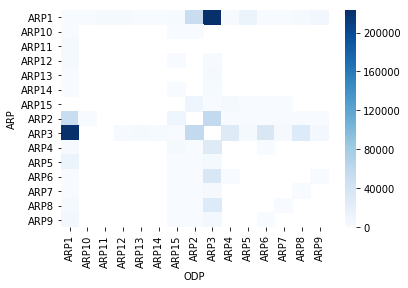

In [49]:
sns.heatmap(df, cmap="Blues")